In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\sai kumar\Surge Classes\HR_comma_sep.csv')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.shape

(14999, 10)

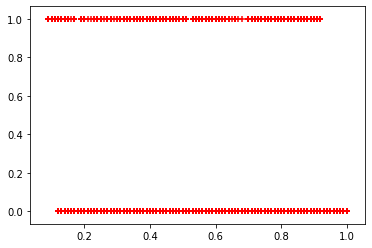

In [14]:
plt.scatter(df.satisfaction_level,df.left,marker='+',color='red')

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [22]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [63]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [68]:
cat=pd.get_dummies(df['sales','salary'])
cat.head()

KeyError: ('sales', 'salary')

In [66]:
merge=pd.concat([df,cat],axis=1)
merge

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_sales
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,NaN
2,0.11,0.88,7,272,4,0,1,0,sales,medium,NaN
3,0.72,0.87,5,223,5,0,1,0,sales,low,NaN
4,0.37,0.52,2,159,3,0,1,0,sales,low,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,NaN
14995,0.37,0.48,2,160,3,0,1,0,support,low,NaN
14996,0.37,0.53,2,143,3,0,1,0,support,low,NaN
14997,0.11,0.96,6,280,4,0,1,0,support,low,NaN


In [23]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [24]:
X=df.drop('left',axis=1)
y=df['left']

In [26]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [43]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
7380,0.69,0.80,5,203,2,1,0,support,high
8703,0.61,0.77,4,195,2,0,0,sales,low
1818,0.83,1.00,5,269,5,0,0,IT,medium
13574,0.57,0.60,2,163,3,0,0,sales,medium
7873,0.18,0.73,4,219,5,0,0,sales,medium
...,...,...,...,...,...,...,...,...,...
11633,0.77,0.89,4,269,10,0,0,management,high
1344,0.39,0.57,2,150,3,0,0,support,low
12815,0.80,0.67,3,236,3,1,0,RandD,low
7293,0.97,0.64,4,152,2,0,0,technical,medium


In [44]:
X_train.shape

(10499, 9)

In [48]:
X_test.shape

(4500, 9)

In [49]:
y_train.shape

(10499,)

In [50]:
y_test.shape

(4500,)

In [57]:
from sklearn.linear_model import LogisticRegression

In [60]:
model=LogisticRegression()

In [62]:
model=model.fit(X_train, y_train)

ValueError: could not convert string to float: 'low'